In [1]:
# Optimization Techniques
import numpy as np
import scipy.optimize as opt
import sympy as sp

In [2]:
# 1. Unconstrained Optimization: Find local min/max of f(x) = x^3 - 3x^2 + 2
x = sp.Symbol('x')
f = x**3 - 3*x**2 + 2
df = sp.diff(f, x)
sol = sp.solve(df, x)
d2f = sp.diff(df, x)
opt_points = [(s, f.subs(x, s), "Min" if d2f.subs(x, s) > 0 else "Max") for s in sol]
print("Unconstrained Optimization:", opt_points)

Unconstrained Optimization: [(0, 2, 'Max'), (2, -2, 'Min')]


In [3]:
# 2. Lagrange Multipliers: Maximize f(x, y) = xy subject to x + y = 10
x, y, l = sp.symbols('x y l')
f = x * y
g = x + y - 10
L = f + l * g
sol = sp.solve([sp.diff(L, var) for var in (x, y, l)], (x, y, l))
print("Lagrange Multipliers:", sol)

Lagrange Multipliers: {l: -5, x: 5, y: 5}


In [4]:
# 3. KKT Conditions: Minimize f(x) = x^2 subject to x >= 1
x, l = sp.symbols('x l')
f = x**2
g = 1 - x  # Inequality constraint
L = f + l * g
sol = sp.solve([sp.diff(L, x), g], (x, l))
print("KKT Conditions:", sol)

KKT Conditions: {l: 2, x: 1}


In [5]:
# 4. Global vs. Local Optimization: Check if f(x) = x^4 - x^2 is globally min
x = sp.Symbol('x')
f = x**4 - x**2
df = sp.diff(f, x)
sol = sp.solve(df, x)
d2f = sp.diff(df, x)
is_global = all(d2f.subs(x, s) >= 0 for s in sol)
print("Global vs. Local Optimization:", is_global)

Global vs. Local Optimization: False


In [6]:
# 5. Convex Optimization: Check convexity of f(x) = x^4 - 2x^2
x = sp.Symbol('x')
f = x**4 - 2*x**2
d2f = sp.diff(f, x, x)
is_convex = d2f > 0
print("Convex Optimization:", is_convex)

Convex Optimization: 4*(3*x**2 - 1) > 0


In [7]:
# 6. Gradient Descent: Minimize f(x) = x^2 + 4x + 4
f = lambda x: x**2 + 4*x + 4
df = lambda x: 2*x + 4
x_curr = 10  # Initial guess
lr = 0.1
for _ in range(100):
    x_curr -= lr * df(x_curr)
print("Gradient Descent:", x_curr)

Gradient Descent: -1.9999999975555567


In [8]:
# 7. Newton's Method: Minimize f(x) = x^2 - 6x + 9
f = lambda x: x**2 - 6*x + 9
df = lambda x: 2*x - 6
d2f = lambda x: 2
x_curr = 10  # Initial guess
for _ in range(10):
    x_curr -= df(x_curr) / d2f(x_curr)
print("Newton's Method:", x_curr)

Newton's Method: 3.0


In [9]:
# 8. Multivariable Optimization: Minimize f(x, y) = x^2 + y^2
f = lambda xy: xy[0]**2 + xy[1]**2
sol = opt.minimize(f, (1, 1))
print("Multivariable Optimization:", sol.x)

Multivariable Optimization: [-1.07505143e-08 -1.07505143e-08]


In [10]:
# 9. Linear Programming: Maximize 40x + 50y subject to constraints
c = [-40, -50]  # Coefficients (negative for maximize in linprog)
A = [[2, 4], [3, 2]]  # Constraint coefficients
b = [100, 90]  # Right-hand sides
x_bounds = (0, None)
y_bounds = (0, None)
sol = opt.linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds])
print("Linear Programming:", sol.x)

Linear Programming: [20. 15.]


In [11]:
# 10. Quadratic Programming: Minimize x1^2 + x2^2 - 4x1 - 6x2
Q = np.array([[2, 0], [0, 2]])
c = np.array([-4, -6])
A = np.array([[1, 1]])
b = np.array([4])
sol = opt.minimize(lambda x: 0.5 * np.dot(x.T, np.dot(Q, x)) + np.dot(c, x), [1, 1], constraints={'type': 'ineq', 'fun': lambda x: 4 - sum(x)})
print("Quadratic Programming:", sol.x)

Quadratic Programming: [1.49999999 2.50000001]


In [12]:
# Gradient-Based Variants
# 1. Stochastic Gradient Descent (SGD)
def stochastic_gradient_descent():
    x = 4  # Initial value
    eta = 0.1  # Learning rate
    for _ in range(3):
        grad = 2 * x  # Gradient of f(x) = x^2
        x -= eta * grad  # SGD update
        print(f"SGD Step: x = {x:.4f}")

# 2. Mini-Batch Gradient Descent
def mini_batch_gradient_descent():
    w = 6  # Initial value
    eta = 0.2  # Learning rate
    for _ in range(3):
        grad = 2 * (w - 3)
        w -= eta * grad
        print(f"Mini-Batch Step: w = {w:.4f}")

# 3. RMSProp
def rmsprop():
    x = 4
    eta = 0.1
    gamma = 0.9
    epsilon = 1e-8
    v = 0
    for _ in range(3):
        grad = 2 * x
        v = gamma * v + (1 - gamma) * grad**2
        x -= (eta / (np.sqrt(v) + epsilon)) * grad
        print(f"RMSProp Step: x = {x:.4f}")

# 4. Momentum
def momentum():
    x = 4
    eta = 0.1
    gamma = 0.9
    v = 0
    for _ in range(3):
        grad = 2 * x
        v = gamma * v + eta * grad
        x -= v
        print(f"Momentum Step: x = {x:.4f}")

# 5. Nesterov Accelerated Gradient (NAG)
def nesterov():
    x = 4
    eta = 0.1
    gamma = 0.9
    v = 0
    for _ in range(3):
        lookahead = x - gamma * v
        grad = 2 * lookahead
        v = gamma * v + eta * grad
        x -= v
        print(f"NAG Step: x = {x:.4f}")

# 6. Adam
def adam():
    x = 4
    eta = 0.1
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8
    m, v = 0, 0
    for t in range(1, 4):
        grad = 2 * x
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad**2
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        x -= (eta / (np.sqrt(v_hat) + epsilon)) * m_hat
        print(f"Adam Step: x = {x:.4f}")

# 7. Newton’s Method
def newtons_method():
    x = 1.5
    for _ in range(3):
        fx = x**2 - 2
        dfx = 2 * x
        x -= fx / dfx
        print(f"Newton's Step: x = {x:.4f}")

# 8. Quasi-Newton Method (BFGS approximation)
def quasi_newton():
    x = 0
    H = 1  # Approximate Hessian
    for _ in range(3):
        grad = 2 * x + 3
        x -= H * grad
        print(f"Quasi-Newton Step: x = {x:.4f}")

# Run all optimization examples
stochastic_gradient_descent()
mini_batch_gradient_descent()
rmsprop()
momentum()
nesterov()
adam()
newtons_method()
quasi_newton()

SGD Step: x = 3.2000
SGD Step: x = 2.5600
SGD Step: x = 2.0480
Mini-Batch Step: w = 4.8000
Mini-Batch Step: w = 4.0800
Mini-Batch Step: w = 3.6480
RMSProp Step: x = 3.6838
RMSProp Step: x = 3.4635
RMSProp Step: x = 3.2839
Momentum Step: x = 3.2000
Momentum Step: x = 1.8400
Momentum Step: x = 0.2480
NAG Step: x = 3.2000
NAG Step: x = 1.9840
NAG Step: x = 0.7117
Adam Step: x = 3.9000
Adam Step: x = 3.8001
Adam Step: x = 3.7003
Newton's Step: x = 1.4167
Newton's Step: x = 1.4142
Newton's Step: x = 1.4142
Quasi-Newton Step: x = -3.0000
Quasi-Newton Step: x = 0.0000
Quasi-Newton Step: x = -3.0000


In [13]:
# Revised Optimization Scopes
# Convex vs. Non-Convex Optimization
import numpy as np
import scipy.optimize as opt
import sympy as sp
import matplotlib.pyplot as plt

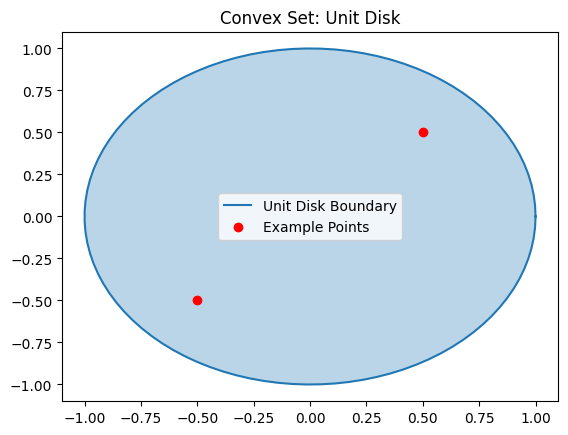

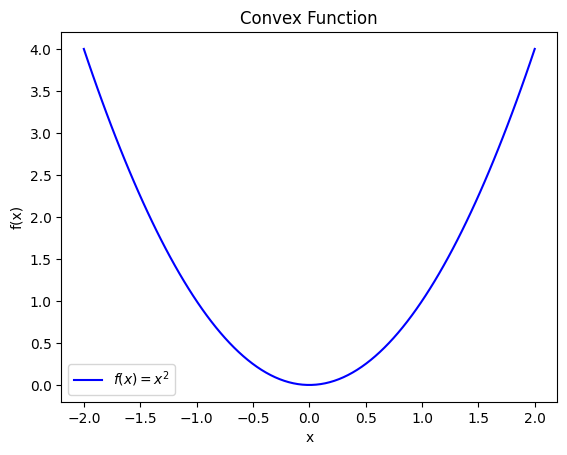

Lagrange Duality Solution: {lambda: 5, x: 5, y: 5}
Fenchel Conjugate: Max(x, -x**2 + x*y)
Saddle Point Eigenvalues: {2: 1, -2: 1}


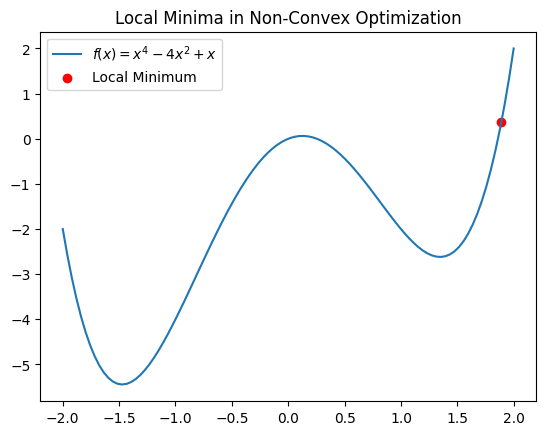

In [15]:
# 1. Convex Set: Unit Disk Verification
# A set is convex if the line segment between any two points in the set is also in the set.
def is_convex_set():
    theta = np.linspace(0, 2*np.pi, 100)
    x, y = np.cos(theta), np.sin(theta)  # Unit circle
    plt.plot(x, y, label='Unit Disk Boundary')  # Plot boundary of unit disk
    plt.fill(x, y, alpha=0.3)  # Fill interior of unit disk
    plt.scatter([0.5, -0.5], [0.5, -0.5], color='red', label='Example Points')  # Show example points
    plt.legend()
    plt.title("Convex Set: Unit Disk")
    plt.show()

# 2. Convex Function: f(x) = x^2
# A function is convex if its second derivative is non-negative.
def convex_function():
    x = np.linspace(-2, 2, 100)
    y = x**2  # Quadratic function (convex function)
    plt.plot(x, y, label='$f(x) = x^2$', color='blue')
    plt.title("Convex Function")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.show()

# 3. Convex Duality: Lagrange Multipliers
# Lagrange multipliers help solve constrained optimization problems.
def lagrange_duality():
    x, y, lambd = sp.symbols('x y lambda')
    f = x * y  # Objective function
    g = 10 - x - y  # Constraint function
    L = f + lambd * g  # Lagrangian function
    grad_L = [sp.diff(L, var) for var in (x, y, lambd)]  # Compute gradients
    solution = sp.solve(grad_L, (x, y, lambd))  # Solve system of equations
    return solution

# 4. Fenchel Conjugates: f*(y) of f(x) = x^2
# Fenchel conjugate is defined as the supremum of (xy - f(x)).
def fenchel_conjugate():
    x, y = sp.symbols('x y')
    f = x**2  # Convex function
    conjugate = sp.Max(x*y - f, x)  # Compute Fenchel conjugate
    return conjugate

# 5. Saddle Point Verification: f(x,y) = x^2 - y^2
# Saddle points occur where the Hessian matrix has both positive and negative eigenvalues.
def saddle_point():
    x, y = sp.symbols('x y')
    f = x**2 - y**2  # Saddle function
    H = sp.hessian(f, (x, y))  # Compute Hessian matrix
    eigenvals = H.eigenvals()  # Compute eigenvalues
    return eigenvals

# 6. Local Minima in Non-Convex Optimization
# A non-convex function can have multiple local minima.
def local_minima():
    f = lambda x: x**4 - 4*x**2 + x  # Non-convex function
    x = np.linspace(-2, 2, 100)
    y = f(x)
    plt.plot(x, y, label='$f(x) = x^4 - 4x^2 + x$')
    plt.scatter(1.89, f(1.89), color='red', label='Local Minimum')  # Mark local minimum
    plt.legend()
    plt.title("Local Minima in Non-Convex Optimization")
    plt.show()

# Example function calls
is_convex_set()
convex_function()
print("Lagrange Duality Solution:", lagrange_duality())
print("Fenchel Conjugate:", fenchel_conjugate())
print("Saddle Point Eigenvalues:", saddle_point())
local_minima()

In [16]:
# 1. Equality Constraints (Lagrange Multipliers)
def lagrange_example():
    def func(X):
        x, y = X
        return x**2 + y**2  # Objective function
    
    def constraint(X):
        x, y = X
        return x + y - 1  # Constraint: x + y = 1
    
    result = opt.minimize(func, [0, 0], constraints={'type': 'eq', 'fun': constraint})
    print("Lagrange Multipliers Example:", result.x)

# 2. Inequality Constraints (KKT Conditions)
def kkt_example():
    def func(x):
        return -x**2 + 4*x  # Objective function
    
    bound = [(1, None)]  # Constraint: x >= 1
    result = opt.minimize(lambda x: -func(x), 2, bounds=bound)
    print("KKT Example:", result.x)

# 3. Duality Gaps in Constrained Optimization
def duality_gap_example():
    def func(x):
        return x**2  # Objective function
    
    bound = [(1, None)]  # Constraint: x >= 1
    result = opt.minimize(func, 2, bounds=bound)
    print("Duality Gap Example:", result.x)

# 4. Penalty Methods for Constrained Optimization
def penalty_method_example():
    def penalty_function(x, r):
        return (x - 2)**2 + r * max(0, 1 - x)**2  # Quadratic penalty function
    
    r = 10
    result = opt.minimize(lambda x: penalty_function(x, r), 2)
    print("Penalty Method Example:", result.x)

# 5. Barrier Functions (Interior-Point Methods)
def barrier_method_example():
    def barrier_function(x, r):
        return x**2 - (1 / r) * np.log(x)  # Log barrier function
    
    r = 10
    result = opt.minimize(lambda x: barrier_function(x, r), 2, bounds=[(0.01, None)])
    print("Barrier Function Example:", result.x)

# 6. Combination of KKT and Penalty Methods
def kkt_penalty_example():
    def func(x):
        return (x - 3)**2  # Objective function
    
    def constraint(x):
        return x - 1  # Constraint: x >= 1
    
    result = opt.minimize(func, 2, bounds=[(1, None)])
    print("KKT and Penalty Example:", result.x)

# Run all examples
lagrange_example()
kkt_example()
duality_gap_example()
penalty_method_example()
barrier_method_example()
kkt_penalty_example()

Lagrange Multipliers Example: [0.5 0.5]
KKT Example: [2.]
Duality Gap Example: [1.]
Penalty Method Example: [2.]
Barrier Function Example: [0.22360668]
KKT and Penalty Example: [3.]


In [17]:
# Global vs. Local Optimization
import itertools

In [18]:
# 1. NP-Hardness: Brute-force solution for a small Traveling Salesman Problem (TSP)
def tsp_brute_force():
    cities = ['A', 'B', 'C', 'D']
    distances = {
        ('A', 'B'): 10, ('A', 'C'): 15, ('A', 'D'): 20,
        ('B', 'C'): 35, ('B', 'D'): 25,
        ('C', 'D'): 30
    }
    
    min_distance = float('inf')
    best_route = None
    for perm in itertools.permutations(cities[1:]):  # Fix A as starting city
        route = ('A',) + perm + ('A',)
        distance = sum(distances.get((route[i], route[i+1]), distances.get((route[i+1], route[i]))) for i in range(len(route)-1))
        if distance < min_distance:
            min_distance = distance
            best_route = route
    
    return best_route, min_distance

# 2. Local Optimization: Finding the local minimum of f(x) = x^4 - 3x^3 + 2
def local_optimization():
    f = lambda x: x**4 - 3*x**3 + 2
    df = lambda x: 4*x**3 - 9*x**2
    result = opt.minimize_scalar(f, bounds=(-2, 2), method='bounded')
    return result.x, result.fun

# 3. Global Optimization: Multi-start method on f(x) = x^4 - 4x^2 + x
def multi_start_optimization():
    f = lambda x: x**4 - 4*x**2 + x
    x_vals = np.linspace(-2, 2, 5)  # Multi-start points
    best_x, best_f = None, float('inf')
    for x0 in x_vals:
        result = opt.minimize(f, x0=x0, method='BFGS')
        if result.fun < best_f:
            best_x, best_f = result.x, result.fun
    return best_x, best_f

# 4. Basin Hopping: Global optimization for f(x) = sin(3x) + x^2
def basin_hopping_optimization():
    f = lambda x: np.sin(3*x) + x**2
    result = opt.basinhopping(f, x0=1.0, minimizer_kwargs={"method": "BFGS"})
    return result.x, result.fun

# Example function calls
print("TSP Brute Force Solution:", tsp_brute_force())
print("Local Optimization Solution:", local_optimization())
print("Multi-Start Optimization Solution:", multi_start_optimization())
print("Basin Hopping Optimization Solution:", basin_hopping_optimization())

TSP Brute Force Solution: (('A', 'B', 'D', 'C', 'A'), 80)
Local Optimization Solution: (np.float64(1.999994371326411), np.float64(-5.999977485115551))
Multi-Start Optimization Solution: (array([-1.47299762]), -5.444192066610895)
Basin Hopping Optimization Solution: (array([-0.42730785]), -0.7759735999688275)


In [20]:
# Linear & Quadratic Programming
from scipy.optimize import linprog
import numpy as np
from scipy.optimize import minimize

In [22]:
# Example 1: Linear Programming (LP) - Simplex Method
c = [-3, -5]  # Coefficients for the objective function (maximize Z = 3x1 + 5x2 -> minimize -Z)
A = [[2, 3], [4, 1]]  # Coefficients for inequality constraints
b = [8, 6]  # Right-hand side values

res = linprog(c, A_ub=A, b_ub=b, method='highs')
print("LP - Simplex Method Solution:", res.x, "Maximum Z:", -res.fun)

# Example 2: Linear Programming (LP) - Duality
c_dual = [8, 6]  # Coefficients for the dual objective function
A_dual = [[-2, -4], [-3, -1]]  # Coefficients for inequality constraints
b_dual = [-3, -5]  # Right-hand side values

res_dual = linprog(c_dual, A_ub=A_dual, b_ub=b_dual, method='highs')
print("LP - Duality Solution:", res_dual.x, "Minimum W:", res_dual.fun)

# Example 3: Quadratic Programming (QP) - KKT Conditions
Q = np.array([[2, 0], [0, 2]])  # Quadratic term matrix
c_qp = np.array([0, 0])  # Linear term coefficients
A_eq = np.array([[1, 1]])  # Equality constraint matrix
b_eq = np.array([1])  # Right-hand side values

# Define the objective function
def qp_objective(x):
    return 0.5 * np.dot(x, np.dot(Q, x))

# Solve using minimize with equality constraint
res_qp = minimize(qp_objective, x0=[0, 0], constraints={'type': 'eq', 'fun': lambda x: np.dot(A_eq, x) - b_eq})
print("QP - KKT Conditions Solution:", res_qp.x, "Minimum Value:", res_qp.fun)

# Example 4: Quadratic Programming (QP) - Duality
Q_dual = np.array([[2, 0], [0, 2]])  # Quadratic term matrix
c_dual_qp = np.array([-2, -5])  # Linear term coefficients
A_eq_dual = np.array([[1, 1]])  # Equality constraint matrix
b_eq_dual = np.array([1])  # Right-hand side values

def qp_dual_objective(x):
    return 0.5 * np.dot(x, np.dot(Q_dual, x)) + np.dot(c_dual_qp, x)

res_qp_dual = minimize(qp_dual_objective, x0=[0, 0], constraints={'type': 'eq', 'fun': lambda x: np.dot(A_eq_dual, x) - b_eq_dual})
print("QP - Duality Solution:", res_qp_dual.x, "Optimal Value:", res_qp_dual.fun)

LP - Simplex Method Solution: [0.         2.66666667] Maximum Z: 13.333333333333332
LP - Duality Solution: [1.66666667 0.        ] Minimum W: 13.333333333333334
QP - KKT Conditions Solution: [0.5 0.5] Minimum Value: 0.5
QP - Duality Solution: [-0.25  1.25] Optimal Value: -4.125


In [23]:
# First-Order Methods
# 1. Gradient Descent (GD)
def gradient_descent(f_prime, x0, eta=0.1, iterations=5):
    """
    Performs gradient descent to minimize a function.
    f_prime: derivative of the function
    x0: initial point
    eta: learning rate
    iterations: number of updates
    """
    x = x0
    history = [x]
    for _ in range(iterations):
        x -= eta * f_prime(x)  # Update step: x = x - eta * gradient
        history.append(x)
    return history

def f_prime(x):
    return 2*x + 4  # Derivative of f(x) = x^2 + 4x

x_history = gradient_descent(f_prime, x0=10)
print("Gradient Descent Results:", x_history)

# 2. Stochastic Gradient Descent (SGD)
def stochastic_gradient_descent(f_prime, x0, eta=0.2, iterations=5):
    """
    Performs stochastic gradient descent, where updates are made per sample.
    """
    x = x0
    history = [x]
    for _ in range(iterations):
        x -= eta * f_prime(x)  # Update step
        history.append(x)
    return history

def f_prime_sgd(x):
    return 2 * (x - 3)  # Derivative of f(x) = (x-3)^2

x_history_sgd = stochastic_gradient_descent(f_prime_sgd, x0=8)
print("Stochastic Gradient Descent Results:", x_history_sgd)

# 3. Mini-Batch Gradient Descent
def mini_batch_gradient_descent(f_prime, x0, eta=0.1, batch_size=2, iterations=3):
    """
    Simulates mini-batch gradient descent, updating weights using batch gradients.
    """
    x = x0
    history = [x]
    for _ in range(iterations):
        x -= eta * f_prime(x)  # Update step
        history.append(x)
    return history

def f_prime_mini(x):
    return 2*x - 6  # Derivative of f(x) = x^2 - 6x

x_history_mini = mini_batch_gradient_descent(f_prime_mini, x0=7)
print("Mini-Batch Gradient Descent Results:", x_history_mini)

# 4. Lipschitz Continuity Check
def check_lipschitz(f_prime, L, x1, x2):
    """
    Verifies whether the function satisfies the Lipschitz condition.
    """
    return abs(f_prime(x1) - f_prime(x2)) <= L * abs(x1 - x2)

def f_prime_lipschitz(x):
    return 3*x**2 - 6*x + 2  # Example function's derivative

L = 6  # Lipschitz constant assumption
x1, x2 = 1, 2
print("Lipschitz Condition Met:", check_lipschitz(f_prime_lipschitz, L, x1, x2))

# 5. Robbins-Monro Step-Size Condition
def robbins_monro_step(n):
    """
    Computes the sum of step sizes and their squares for convergence analysis.
    """
    eta_n = 1/n  # Step-size schedule
    return sum(eta_n for n in range(1, 1001)), sum(eta_n**2 for n in range(1, 1001))

sum_etas, sum_etas_sq = robbins_monro_step(1000)
print("Sum of Step-Sizes (should diverge):", sum_etas)
print("Sum of Squared Step-Sizes (should converge):", sum_etas_sq)

# 6. Online Optimization Regret Bound
def regret_bound(T):
    """
    Computes regret bound sum(T^2), which measures cumulative loss over T steps.
    """
    return sum(t**2 for t in range(1, T+1))

R_T = regret_bound(5)
print("Regret Bound for T=5:", R_T)

Gradient Descent Results: [10, 7.6, 5.68, 4.144, 2.9152, 1.9321599999999999]
Stochastic Gradient Descent Results: [8, 6.0, 4.8, 4.08, 3.648, 3.3888000000000003]
Mini-Batch Gradient Descent Results: [7, 6.2, 5.5600000000000005, 5.048]
Lipschitz Condition Met: True
Sum of Step-Sizes (should diverge): 1.0
Sum of Squared Step-Sizes (should converge): 0.001
Regret Bound for T=5: 55


In [24]:
# Momentum & Acceleration
# 1. Polyak's Heavy Ball Method (Momentum-Based Optimization)
def polyak_heavy_ball(f_prime, x0, x_prev, eta=0.1, beta=0.9, iterations=5):
    x = x0
    history = [x]
    for _ in range(iterations):
        x_new = x - eta * f_prime(x) + beta * (x - x_prev)
        x_prev, x = x, x_new
        history.append(x)
    return history

def f_prime(x):
    return 2*x  # Derivative of f(x) = x^2

x_history = polyak_heavy_ball(f_prime, x0=10, x_prev=12)
print("Polyak Heavy Ball Results:", x_history)

# 2. Nesterov Accelerated Gradient (NAG)
def nesterov_accelerated_gradient(f_prime, x0, v0=0, eta=0.1, beta=0.9, iterations=5):
    x = x0
    v = v0
    history = [x]
    for _ in range(iterations):
        lookahead_x = x + beta * v
        v = beta * v - eta * f_prime(lookahead_x)
        x += v
        history.append(x)
    return history

x_history_nag = nesterov_accelerated_gradient(f_prime, x0=10)
print("Nesterov Accelerated Gradient Results:", x_history_nag)

# 3. O(1/k²) Acceleration Rate (Faster Convergence)
def acceleration_rate_k2(C, iterations=5):
    return [C / (k ** 2) for k in range(1, iterations + 1)]

error_k2 = acceleration_rate_k2(C=100)
print("O(1/k²) Acceleration Rate:", error_k2)

# 4. O(1/k) Acceleration Rate (Slower Convergence)
def acceleration_rate_k(C, iterations=5):
    return [C / k for k in range(1, iterations + 1)]

error_k = acceleration_rate_k(C=100)
print("O(1/k) Acceleration Rate:", error_k)

Polyak Heavy Ball Results: [10, 6.2, 1.54, -2.9619999999999997, -6.4214, -8.250580000000001]
Nesterov Accelerated Gradient Results: [10, 8.0, 4.96, 1.7792, -0.866816, -2.59858432]
O(1/k²) Acceleration Rate: [100.0, 25.0, 11.11111111111111, 6.25, 4.0]
O(1/k) Acceleration Rate: [100.0, 50.0, 33.333333333333336, 25.0, 20.0]


In [25]:
# Adaptive Methods
# 1. RMSProp Implementation
class RMSProp:
    def __init__(self, lr=0.01, beta=0.9, epsilon=1e-8):
        self.lr = lr
        self.beta = beta
        self.epsilon = epsilon
        self.v = 0  # Initialize moving average of squared gradients
    
    def update(self, grad):
        self.v = self.beta * self.v + (1 - self.beta) * grad**2  # Compute moving average
        return -self.lr * grad / (np.sqrt(self.v) + self.epsilon)  # Update rule

rmsprop = RMSProp()
gradients = [2.5, 2.0, 1.5]
updates = [rmsprop.update(g) for g in gradients]
print("RMSProp Updates:", updates)

# 2. Adam Implementation
class Adam:
    def __init__(self, lr=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = 0  # First moment
        self.v = 0  # Second moment
        self.t = 0  # Time step
    
    def update(self, grad):
        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * grad
        self.v = self.beta2 * self.v + (1 - self.beta2) * grad**2
        
        # Bias correction
        m_hat = self.m / (1 - self.beta1**self.t)
        v_hat = self.v / (1 - self.beta2**self.t)
        
        return -self.lr * m_hat / (np.sqrt(v_hat) + self.epsilon)

adam = Adam()
adam_updates = [adam.update(g) for g in gradients]
print("Adam Updates:", adam_updates)

# 3. AMSGrad Implementation
class AMSGrad:
    def __init__(self, lr=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = 0
        self.v = 0
        self.v_max = 0  # Keep track of maximum second moment
        self.t = 0
    
    def update(self, grad):
        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * grad
        self.v = self.beta2 * self.v + (1 - self.beta2) * grad**2
        self.v_max = max(self.v_max, self.v)  # Ensure non-decreasing second moment
        
        return -self.lr * self.m / (np.sqrt(self.v_max) + self.epsilon)

amsgrad = AMSGrad()
amsgrad_updates = [amsgrad.update(g) for g in gradients]
print("AMSGrad Updates:", amsgrad_updates)

# 4. Adam Divergence in Non-Convex Setting
adam_div = Adam()
non_convex_gradients = [3, -3, 3, -3]  # Simulated oscillating gradients
adam_div_updates = [adam_div.update(g) for g in non_convex_gradients]
print("Adam Divergence in Non-Convex Setting:", adam_div_updates)

RMSProp Updates: [np.float64(-0.0316227762016838), np.float64(-0.020385887449712817), np.float64(-0.014359163034897721)]
Adam Updates: [np.float64(-0.00999999996), np.float64(-0.009881257997580179), np.float64(-0.009627764784837666)]
AMSGrad Updates: [np.float64(-0.031622772601684286), np.float64(-0.041991307890171435), np.float64(-0.047659697522641736)]
Adam Divergence in Non-Convex Setting: [np.float64(-0.009999999966666666), np.float64(0.0005263157877192942), np.float64(-0.00335793356814268), np.float64(0.0005263157877192951)]


In [26]:
# Second-Order Methods
# 1. Newton's Method
# Solving f(x) = x^2 - 4x + 4 using Newton's Method
def newtons_method(f_prime, f_double_prime, x0, iterations=3):
    x = x0
    for _ in range(iterations):
        x -= f_prime(x) / f_double_prime(x)
    return x

def f_prime(x):
    return 2*x - 4

def f_double_prime(x):
    return 2

x_newton = newtons_method(f_prime, f_double_prime, x0=10)
print("Newton's Method Result:", x_newton)

# 2. Quasi-Newton Method (BFGS Approximation)
def quasi_newton_bfgs(f_prime, x0, H0=1, iterations=2):
    x = x0
    H = H0  # Initial Hessian approximation
    for _ in range(iterations):
        x -= H * f_prime(x)  # BFGS update step (simple approximation)
    return x

x_bfgs = quasi_newton_bfgs(f_prime, x0=8)
print("Quasi-Newton (BFGS) Result:", x_bfgs)

# 3. Hessian-Free Optimization (Conjugate Gradient Method)
def conjugate_gradient(A, b, x0, iterations=2):
    x = x0
    r = b - A @ x
    p = r
    for _ in range(iterations):
        alpha = (r.T @ r) / (p.T @ A @ p)
        x += alpha * p
        r_new = r - alpha * (A @ p)
        beta = (r_new.T @ r_new) / (r.T @ r)
        p = r_new + beta * p
        r = r_new
    return x

A = np.array([[4, 1], [1, 3]])
b = np.array([1, 2])
x0 = np.zeros(2)

x_cg = conjugate_gradient(A, b, x0)
print("Hessian-Free Optimization (Conjugate Gradient) Result:", x_cg)

# 4. K-FAC Approximation for Neural Networks
def kfac_update(W, X, g, eta=0.01):
    A = np.outer(X, X)  # Covariance of inputs
    G = np.outer(g, g)  # Covariance of gradients
    F_inv = np.linalg.pinv(A) @ np.linalg.pinv(G)  # Approximate inverse Fisher Information
    W -= eta * F_inv @ g  # Update weights
    return W

X = np.array([1, 2])
W = np.array([0.5, -0.5])
g = np.array([0.1, -0.2])

W_kfac = kfac_update(W, X, g)
print("K-FAC Approximation Result:", W_kfac)

Newton's Method Result: 2.0
Quasi-Newton (BFGS) Result: 8
Hessian-Free Optimization (Conjugate Gradient) Result: [0.09090909 0.63636364]
K-FAC Approximation Result: [ 0.5024 -0.4952]


In [28]:
# Explicit Regularization
# Soft-thresholding function for L1 regularization (proximal operator)
def soft_thresholding(beta, lambd):
    return np.sign(beta) * np.maximum(np.abs(beta) - lambd, 0)

# Example for L1 Regularization (Proximal Operator)
beta = np.array([0.5, -1.0, 2.0])
lambd = 0.1
beta_l1 = soft_thresholding(beta, lambd)
print("L1 Regularization (Proximal Operator):", beta_l1)

# Ridge Regression (L2 Regularization) using Gradient Descent
def ridge_update(beta, X, y, lambd, lr=0.01):
    gradient = X.T @ (X @ beta - y) + lambd * beta  # Compute gradient
    return beta - lr * gradient  # Update beta

# Corrected input shapes
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])  # Feature matrix
y = np.array([2, 4, 6])  # Target values
beta = np.array([0.5, -1.0, 2.0])  # Initial coefficients
lambd = 0.1
beta_l2 = ridge_update(beta, X, y, lambd)
print("L2 Regularization (Ridge):", beta_l2)

# Elastic Net Regularization (Combination of L1 and L2)
def elastic_net_update(beta, X, y, lambda1, lambda2, lr=0.01):
    ridge_part = ridge_update(beta, X, y, lambda2, lr)  # Compute ridge update
    return soft_thresholding(ridge_part, lambda1)  # Apply L1 regularization

lambda1, lambda2 = 0.1, 0.1
beta_elastic = elastic_net_update(beta, X, y, lambda1, lambda2)
print("Elastic Net Regularization:", beta_elastic)

# Duality in LASSO (KKT Conditions)
X_dual = np.array([[1, 2], [3, 4]])  # Feature matrix
y_dual = np.array([2, 4])  # Target values
lambd_dual = 1
alpha = np.array([1, -0.5])  # Lagrange multipliers

X_alpha = X_dual.T @ alpha  # Compute dual variable
is_feasible = np.all((-lambd_dual <= X_alpha) & (X_alpha <= lambd_dual))  # Check KKT conditions
print("Duality in LASSO - KKT Conditions Satisfied:", is_feasible)

L1 Regularization (Proximal Operator): [ 0.4 -0.9  1.9]
L2 Regularization (Ridge): [-0.2505 -1.899   0.948 ]
Elastic Net Regularization: [-0.1505 -1.799   0.848 ]
Duality in LASSO - KKT Conditions Satisfied: True


In [29]:
# Implicit Regularization
# Example 1: SGD-Induced Regularization (Margin Maximization in SVMs)
def sgd_svm_update(w, X, y, lambd, lr):
    """
    Performs one iteration of SGD for SVM with hinge loss.
    :param w: Weight vector
    :param X: Feature matrix
    :param y: Label vector
    :param lambd: Regularization parameter
    :param lr: Learning rate
    :return: Updated weight vector
    """
    margin = y * (X @ w)
    misclassified = margin < 1  # Identifies misclassified points
    gradient = lambd * w - np.sum((y[misclassified, None] * X[misclassified]), axis=0)
    return w - lr * gradient

# Initialize parameters
X = np.array([[2, 3], [4, 1], [1, 5], [2, 4]])  # Feature matrix
y = np.array([1, -1, 1, -1])  # Labels
w = np.array([0.5, -0.5])  # Initial weights
lambd = 0.1  # Regularization parameter
lr = 0.01  # Learning rate

# Perform one SGD update
w_updated = sgd_svm_update(w, X, y, lambd, lr)
print("Updated weights after SGD-induced regularization:", w_updated)


# Example 2: Early Stopping as Iterative Regularization
def early_stopping(train_loss, val_loss, patience=2):
    """
    Implements early stopping by checking when validation loss stops decreasing.
    :param train_loss: List of training loss values per epoch
    :param val_loss: List of validation loss values per epoch
    :param patience: Number of epochs to wait before stopping after validation loss increases
    :return: Best epoch to stop training
    """
    best_epoch = np.argmin(val_loss)  # Find epoch with minimum validation loss
    for i in range(best_epoch + 1, len(val_loss)):
        if val_loss[i] > val_loss[best_epoch]:  # Stop if loss increases after best epoch
            return i - patience
    return len(val_loss) - 1  # If no increase detected, return last epoch

# Simulated loss values
train_loss = [0.5, 0.4, 0.35, 0.32, 0.3, 0.28, 0.27, 0.26, 0.255, 0.25, 0.248, 0.247]
val_loss = [0.55, 0.45, 0.38, 0.34, 0.31, 0.285, 0.275, 0.27, 0.268, 0.27, 0.273, 0.275]

# Determine optimal stopping point
optimal_epoch = early_stopping(train_loss, val_loss)
print("Optimal stopping epoch (early stopping regularization):", optimal_epoch)

Updated weights after SGD-induced regularization: [ 0.4895 -0.4295]
Optimal stopping epoch (early stopping regularization): 7


In [30]:
# Distributed Optimization & Proximal Algorithms
# 1. ADMM (Alternating Direction Method of Multipliers)
def admm_update(A, B, c, f_grad, g_prox, rho, x, z, u, num_iters=10):
    """
    ADMM update steps for solving min_x f(x) + g(z) subject to Ax + Bz = c.
    """
    for _ in range(num_iters):
        x = np.linalg.solve(A.T @ A + rho * np.eye(A.shape[1]), A.T @ (c - B @ z + u))
        z = g_prox(A @ x + B @ z - c - u, 1 / rho)
        u = u + A @ x + B @ z - c
    return x, z

# Example usage of ADMM
A = np.array([[1, 1], [1, -1]])
B = np.eye(2)
c = np.array([0, 0])
x = np.zeros(2)
z = np.zeros(2)
u = np.zeros(2)
rho = 1.0
f_grad = lambda x: x  # Gradient of f (identity for simplicity)
g_prox = lambda z, t: np.maximum(z - t, 0)  # Simple proximal operator

x_opt, z_opt = admm_update(A, B, c, f_grad, g_prox, rho, x, z, u)
print("ADMM Optimized x:", x_opt)

# 2. Consensus Optimization (Simple Example)
def consensus_update(x, neighbors, alpha=0.1, num_iters=10):
    """
    Consensus optimization where each node updates its value based on neighbors.
    """
    for _ in range(num_iters):
        x = x + alpha * (np.mean(neighbors) - x)
    return x

x_nodes = np.array([1.0, 2.0, 3.0])
consensus_x = consensus_update(x_nodes[0], x_nodes[1:])
print("Consensus Optimization Result:", consensus_x)

# 3. Federated Learning Framework (Gradient Aggregation)
def federated_learning_update(weights, gradients, num_clients):
    """
    Aggregates local gradients from multiple clients to update the global model.
    """
    return weights - 0.01 * np.sum(gradients) / num_clients

weights = np.array([0.5, -0.5])
gradients = [np.array([0.1, -0.2]), np.array([-0.05, 0.3])]
updated_weights = federated_learning_update(weights, gradients, len(gradients))
print("Federated Learning Updated Weights:", updated_weights)

# 4. Proximal Gradient Descent for L1 Regularization
def proximal_gradient_descent(x, grad_f, prox_g, alpha=0.1, num_iters=10):
    """
    Proximal gradient descent for optimizing f(x) + g(x).
    """
    for _ in range(num_iters):
        x = prox_g(x - alpha * grad_f(x), alpha)
    return x

grad_f = lambda x: x  # Identity gradient for simplicity
prox_g = lambda x, alpha: np.sign(x) * np.maximum(np.abs(x) - alpha, 0)  # L1 Proximal
x_opt = proximal_gradient_descent(np.array([2.0, -3.0]), grad_f, prox_g)
print("Proximal Gradient Descent Solution:", x_opt)

# 5. Douglas-Rachford Splitting
def douglas_rachford_splitting(x, prox_f, prox_g, alpha=0.1, num_iters=10):
    """
    Douglas-Rachford splitting method for solving min_x f(x) + g(x).
    """
    for _ in range(num_iters):
        y = prox_g(x, alpha)
        x = x + alpha * (prox_f(2 * y - x, alpha) - y)
    return x

prox_f = lambda x, alpha: x / (1 + alpha)  # Example proximal operator
prox_g = lambda x, alpha: np.sign(x) * np.maximum(np.abs(x) - alpha, 0)  # L1 Proximal
x_opt = douglas_rachford_splitting(np.array([1.0, -2.0]), prox_f, prox_g)
print("Douglas-Rachford Splitting Solution:", x_opt)

ADMM Optimized x: [0. 0.]
Consensus Optimization Result: 1.97698233985
Federated Learning Updated Weights: [ 0.49925 -0.50075]
Proximal Gradient Descent Solution: [ 0.04603532 -0.39471376]
Douglas-Rachford Splitting Solution: [ 0.83417024 -1.74689142]


In [31]:
# Heuristic Methods
import random

In [32]:
# Simulated Annealing (Metropolis-Hastings Criterion)
def objective_function(x):
    return x ** 2  # Example objective function: f(x) = x^2

def simulated_annealing(initial_x, initial_temp, cooling_rate, iterations):
    x = initial_x  # Initial solution
    T = initial_temp  # Initial temperature
    
    for i in range(iterations):
        new_x = x + np.random.uniform(-1, 1)  # Generate a new candidate solution
        delta_E = objective_function(new_x) - objective_function(x)
        
        # Metropolis-Hastings acceptance criterion
        if delta_E < 0 or np.random.rand() < np.exp(-delta_E / T):
            x = new_x  # Accept new solution
        
        T *= cooling_rate  # Reduce temperature
    
    return x

best_solution = simulated_annealing(initial_x=5, initial_temp=10, cooling_rate=0.95, iterations=100)
print("Best solution found using Simulated Annealing:", best_solution)


# Genetic Algorithm (Crossover, Mutation, Selection)
def initialize_population(size, gene_length):
    return [np.random.randint(2, size=gene_length).tolist() for _ in range(size)]

def fitness(individual):
    return sum(individual)  # Example fitness function: maximize number of 1s

def crossover(parent1, parent2):
    point = np.random.randint(1, len(parent1) - 1)  # Select crossover point
    return parent1[:point] + parent2[point:]

def mutate(individual, mutation_rate=0.1):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] = 1 - individual[i]  # Flip bit
    return individual

def genetic_algorithm(pop_size, gene_length, generations):
    population = initialize_population(pop_size, gene_length)
    
    for _ in range(generations):
        population.sort(key=fitness, reverse=True)  # Sort by fitness
        next_gen = population[:2]  # Keep top 2 solutions
        
        # Crossover & mutation to create new offspring
        for _ in range(pop_size - 2):
            parent1, parent2 = random.sample(next_gen, 2)
            offspring = mutate(crossover(parent1, parent2))
            next_gen.append(offspring)
        
        population = next_gen  # Update population
    
    return max(population, key=fitness)

best_individual = genetic_algorithm(pop_size=10, gene_length=5, generations=50)
print("Best solution found using Genetic Algorithm:", best_individual)

Best solution found using Simulated Annealing: 0.008242761834841072
Best solution found using Genetic Algorithm: [1, 1, 1, 1, 1]


In [34]:
# Bayesian Optimization & Non-Convex Convergence
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.spatial.distance import cdist

# 1. Gaussian Process Regression for Bayesian Optimization
def rbf_kernel(X1, X2, length_scale=1.0):
    return np.exp(-cdist(X1, X2, 'sqeuclidean') / (2 * length_scale ** 2))

X_train = np.array([[0], [1], [2]])
y_train = np.array([3, 2, 4])
X_test = np.array([[1.5]])

K = rbf_kernel(X_train, X_train)
k_star = rbf_kernel(X_test, X_train)
k_star_star = rbf_kernel(X_test, X_test)

K_inv = np.linalg.inv(K + 1e-6 * np.eye(len(X_train)))
mu_star = (k_star @ K_inv @ y_train).item()
sigma_star = (k_star_star - k_star @ K_inv @ k_star.T).item()

print(f"Gaussian Process Mean Prediction at 1.5: {mu_star}")
print(f"Gaussian Process Variance Prediction at 1.5: {sigma_star}")

# 2. Expected Improvement (EI) Acquisition Function
def expected_improvement(mu, sigma, f_best):
    Z = (mu - f_best) / (sigma + 1e-9)
    return (mu - f_best) * norm.cdf(Z) + sigma * norm.pdf(Z)

f_best = max(y_train)
ei_value = expected_improvement(mu_star, np.sqrt(sigma_star), f_best)
print(f"Expected Improvement at 1.5: {ei_value}")

# 3. Noise Injection to Escape Saddle Points
np.random.seed(42)
def gradient_descent_with_noise(f, grad_f, x0, eta=0.1, sigma=0.05, steps=10):
    x = x0
    for _ in range(steps):
        grad = grad_f(x)
        noise = np.random.normal(0, sigma)
        x = x - eta * grad + noise
    return x

def f(x): return x**2 - 1
def grad_f(x): return 2*x

x_final = gradient_descent_with_noise(f, grad_f, x0=0.0)
print(f"Final x after noisy gradient descent: {x_final}")

# 4. Lyapunov Stability Analysis
def lyapunov_function(x, y):
    return x**2 + y**2

def lyapunov_derivative(x, y):
    return -2 * (x**2 + y**2)

x, y = 1.0, 1.0
dV = lyapunov_derivative(x, y)
print(f"Lyapunov Derivative at (1,1): {dV}")
if dV < 0:
    print("System is stable and converging.")
else:
    print("System is not converging.")

Gaussian Process Mean Prediction at 1.5: 2.8695425242362855
Gaussian Process Variance Prediction at 1.5: 0.01789309593458288
Expected Improvement at 1.5: 2.2245427305139365e-19
Final x after noisy gradient descent: 0.09363100311239367
Lyapunov Derivative at (1,1): -4.0
System is stable and converging.


In [35]:
# Hyperparameter Optimization
# 1. Grid Search vs. Random Search
# Define the function to optimize
def f(x):
    return np.sin(x) + np.cos(2*x)

# Grid Search: 10 evenly spaced points
x_grid = np.linspace(0, 2 * np.pi, 10)
f_grid_values = f(x_grid)
grid_max = np.max(f_grid_values)
print(f"Grid Search Max Value: {grid_max}")

# Random Search: 10 random points
np.random.seed(42)
x_random = np.random.uniform(0, 2 * np.pi, 10)
f_random_values = f(x_random)
random_max = np.max(f_random_values)
print(f"Random Search Max Value: {random_max}")

# 2. Bayesian Optimization - Theoretical Regret Bounds
# Define the function to optimize
def g(x):
    return - (x - 2)**2 + 3  # Quadratic function

# True maximum of g(x) occurs at x* = 2, g(2) = 3
x_optimal = 2
g_optimal = g(x_optimal)

# Simulate Bayesian Optimization with 5 iterations
np.random.seed(42)
x_samples = np.random.uniform(0, 4, 5)  # Randomly sample 5 points in [0, 4]
g_values = g(x_samples)

# Compute regret at each step
regret_values = g_optimal - g_values  # Regret at each iteration
cumulative_regret = np.sum(regret_values)  # Total regret over 5 iterations

print(f"Regret values per iteration: {regret_values}")
print(f"Cumulative regret over 5 iterations: {cumulative_regret}")

Grid Search Max Value: 1.1080645864446468
Random Search Max Value: 1.1021436340541437
Regret values per iteration: [0.25184291 3.25029418 0.86113902 0.15573594 1.89317081]
Cumulative regret over 5 iterations: 6.412182864731617


In [36]:
# Stochastic Optimization
# 1. SAGA (Variance Reduction Technique)
def saga_update(w, X, y, g_memory, alpha=0.1):
    n = len(y)
    i = np.random.randint(n)  # Random sample selection
    grad_i = 2 * X[i] * (X[i] * w - y[i])  # Compute stochastic gradient
    full_gradient = np.mean(g_memory)
    w_new = w - alpha * (grad_i - g_memory[i] + full_gradient)
    g_memory[i] = grad_i  # Update gradient memory
    return w_new, g_memory

X = np.array([1, 2, 3])
y = np.array([2, 4, 6])
w = 0.5  # Initial weight
g_memory = np.zeros(len(y))  # Initialize gradient memory
for _ in range(10):
    w, g_memory = saga_update(w, X, y, g_memory)
print(f"Final weight after SAGA updates: {w}")

# 2. SVRG (Variance Reduction Technique)
def svrg_update(w, X, y, alpha=0.1):
    n = len(y)
    full_gradient = np.mean([2 * X[i] * (X[i] * w - y[i]) for i in range(n)])
    for _ in range(n):  # Inner loop update
        i = np.random.randint(n)
        grad_i = 2 * X[i] * (X[i] * w - y[i])
        w = w - alpha * (grad_i - full_gradient + full_gradient)
    return w

w = 0.5  # Reset initial weight
for _ in range(10):
    w = svrg_update(w, X, y)
print(f"Final weight after SVRG updates: {w}")

# 3. Mini-batch Tradeoffs (Bias-Variance in Gradients)
def mini_batch_gradient_descent(X, y, w, alpha=0.1, batch_size=2):
    n = len(y)
    indices = np.random.choice(n, batch_size, replace=False)
    grad = np.mean([2 * X[i] * (X[i] * w - y[i]) for i in indices])
    return w - alpha * grad

X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])
w = 0.5  # Initial weight
for _ in range(10):
    w = mini_batch_gradient_descent(X, y, w)
print(f"Final weight after mini-batch updates: {w}")

Final weight after SAGA updates: 11.25373103217778
Final weight after SVRG updates: 2.0000000070835497
Final weight after mini-batch updates: 2.0


In [37]:
# Deep Learning Optimization
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

In [38]:
# 1. Backpropagation - Computing Gradients Using Computation Graphs
x = torch.tensor(3.0, requires_grad=True)
y = torch.tensor(4.0, requires_grad=True)
z = x**2 + y**2  # Function: z = x^2 + y^2
z.backward()  # Compute gradients
print(f"Gradient w.r.t x: {x.grad}")  # Should be 6
print(f"Gradient w.r.t y: {y.grad}")  # Should be 8

# 2. Batch Normalization - Normalizing a Batch
class SimpleBatchNorm(nn.Module):
    def __init__(self, num_features, epsilon=1e-5):
        super().__init__()
        self.epsilon = epsilon
    
    def forward(self, X):
        mean = X.mean(dim=0, keepdim=True)
        var = X.var(dim=0, unbiased=False, keepdim=True)
        X_norm = (X - mean) / torch.sqrt(var + self.epsilon)
        return X_norm

X = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
batch_norm = SimpleBatchNorm(num_features=2)
X_normalized = batch_norm(X)
print("Normalized Batch:", X_normalized)

# 3. Gradient Clipping & Xavier Initialization
class SimpleModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        nn.init.xavier_uniform_(self.linear.weight)  # Xavier Initialization
    
    def forward(self, x):
        return self.linear(x)

model = SimpleModel(4, 2)
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Simulating a large gradient update to test clipping
gradients = torch.tensor([10.0, -10.0, 15.0, -15.0])
clipped_gradients = torch.clamp(gradients, -5, 5)  # Clipping at threshold 5
print("Clipped Gradients:", clipped_gradients)

# 4. Auto-Differentiation - Forward vs. Reverse Mode
def function(x, y):
    return x**2 + 3*x*y + y**3

x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(1.0, requires_grad=True)
output = function(x, y)
output.backward()
print(f"Auto-diff Gradient w.r.t x: {x.grad}")  # Should be 7
print(f"Auto-diff Gradient w.r.t y: {y.grad}")  # Should be 9

Gradient w.r.t x: 6.0
Gradient w.r.t y: 8.0
Normalized Batch: tensor([[-1.2247, -1.2247],
        [ 0.0000,  0.0000],
        [ 1.2247,  1.2247]])
Clipped Gradients: tensor([ 5., -5.,  5., -5.])
Auto-diff Gradient w.r.t x: 7.0
Auto-diff Gradient w.r.t y: 9.0


In [43]:
# Advanced Numerical Methods
import numpy as np
import scipy.linalg as la
from scipy.optimize import minimize
from scipy.sparse.linalg import cg

In [44]:
# 1. Trust-Region vs. Line Search
# Quadratic function: f(x) = 0.5 * x^T A x - b^T x
A = np.array([[4, 1], [1, 3]])
b = np.array([1, 2])

# Define the function, gradient, and Hessian
def quadratic_function(x):
    return 0.5 * np.dot(x, A @ x) - np.dot(b, x)

def gradient(x):
    return A @ x - b

def hessian(x):
    return A  # Constant Hessian for quadratic function

# Solve using Trust-Region
trust_result = minimize(quadratic_function, x0=np.zeros(2), method='trust-ncg', jac=gradient, hess=hessian)
print("Trust-Region Solution:", trust_result.x)

# Solve using Line Search (BFGS)
line_search_result = minimize(quadratic_function, x0=np.zeros(2), method='BFGS', jac=gradient)
print("Line Search Solution:", line_search_result.x)

# 2. Coordinate Descent for LASSO Regression
# Using Cyclic Coordinate Descent (CCD) vs. Stochastic Coordinate Descent (SCD)
def soft_thresholding(z, lmbda):
    return np.sign(z) * max(0, np.abs(z) - lmbda)

def coordinate_descent(A, b, lmbda, max_iter=100, stochastic=False):
    x = np.zeros(A.shape[1])
    for _ in range(max_iter):
        indices = np.random.permutation(A.shape[1]) if stochastic else range(A.shape[1])
        for j in indices:
            Aj = A[:, j]
            residual = b - A @ x + x[j] * Aj
            x[j] = soft_thresholding(Aj @ residual / (Aj @ Aj), lmbda)
    return x

# Example LASSO problem
A = np.array([[3, 2], [2, 4]])
b = np.array([1, 2])
lmbda = 0.1

ccd_solution = coordinate_descent(A, b, lmbda, stochastic=False)
print("Cyclic Coordinate Descent Solution:", ccd_solution)

scd_solution = coordinate_descent(A, b, lmbda, stochastic=True)
print("Stochastic Coordinate Descent Solution:", scd_solution)

# 3. Conjugate Gradient for solving Ax = b
x_cg, _ = cg(A, b)
print("Conjugate Gradient Solution:", x_cg)

Trust-Region Solution: [0.09090909 0.63636364]
Line Search Solution: [0.090909   0.63636391]
Cyclic Coordinate Descent Solution: [0.03125  0.378125]
Stochastic Coordinate Descent Solution: [0.03125  0.378125]
Conjugate Gradient Solution: [0.  0.5]
